In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# MP 1
## Inital dataset analysis
Plots of the <b>distributions</b> of the instances in each class for Task1 and Task2.

Text(0, 0.5, 'Number of Instances')

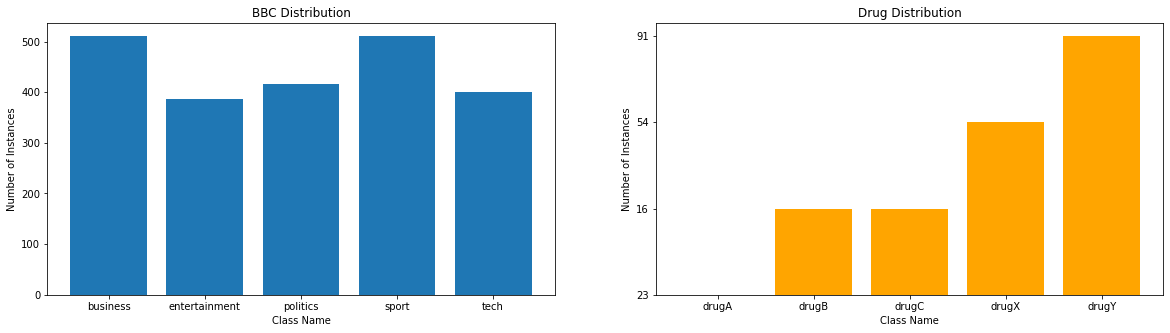

In [2]:
fig, (plt1, plt2) = plt.subplots(1 ,2, figsize=(20,5))

'''
TASK1
'''
classes = np.array(["business", "entertainment", "politics", "sport", "tech"])
class_article_count = np.zeros(classes.shape[0])

for i in range(len(classes)):
    direc = "BBC/" + classes[i]
    class_article_count[i] = len(os.listdir(direc))

plt1.bar(classes,class_article_count)
plt1.set_title('BBC Distribution')
plt1.set_xlabel('Class Name')
plt1.set_ylabel('Number of Instances')

'''
TASK2
'''
df = pd.read_csv('drug200.csv')

classes = np.array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
class_instance_count = np.zeros_like(classes)

for i in range(classes.shape[0]):
	class_instance_count[i] = (df.Drug.values == classes[i]).sum()

plt2.bar(classes,class_instance_count, color='orange')
plt2.set_title('Drug Distribution')
plt2.set_xlabel('Class Name')
plt2.set_ylabel('Number of Instances')

The distributions in Task 1 (BBC Distribution) and Task 2 (Drug Distribution) are very different.

The classes in BBC Distribution are evenly distributed.<br> All five classes (business, entertainment, politics, sport, and tech) have a similar number of sample articles (number of instances).

While on the other hand, the classes in the Drug Distribution are unbalanced, creating a skewed distribution.


<i>Accuracy</i> is well suited for <b>Task 1</b> since we have a <b>well-balanced</b> dataset.<br> It is easy to see in the BBC Distribution that all article categories have between 400-500 article instances each.<br>
Also, it is appropriate to use the accuracy metric for Task 1 as all classes are equally important and equally represented in this case. We are not interested in one type of news category more than another.

As for <b>Task 2</b>, <i>precision</i> and <i>recall</i> are better-suited metrics to use to evaluate the model.<br>
Accuracy is not appropriate in this case since we clearly have a very <b>unbalanced</b> distribution of instances.<br>
<br>In addition to that, although precision could be used in this task, in a <b>medical application</b>, it is preferable to pick a model with the <b>highest recall</b>.<br> Since we are dealing with medical data, one type of drug class could be more important than another.

##  Analysis of the results of all the models

Text(0.5, 1.0, 'Multinomial Naive Bayes Classifier')

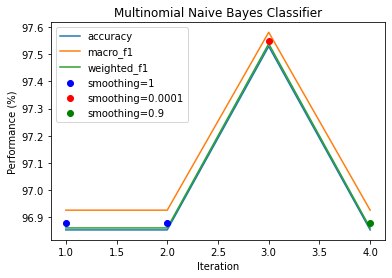

In [39]:
accuracy, f1_macro, f1_weighted = np.zeros(4), np.zeros(4), np.zeros(4)
# Q3 - Load the corpus using load files, this assigns a class to each article
files_info = sklearn.datasets.load_files(container_path='BBC/', encoding='latin1')

corpus = files_info.data # articles from all classes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus) # Learns the vocabulary dictionary and return document-term matrix. [article#, word#, word_count]
y = files_info.target

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=.2, random_state=None)

clf = MultinomialNB().fit(X_train, y_train) # Create a model using training data
y_test_pred = clf.predict(X_test) # Use the model created to make predictions on the test data

accuracy[0] = accuracy_score(y_test, y_test_pred)
f1_macro[0] = f1_score(y_test, y_test_pred, average='macro')
f1_weighted[0] = f1_score(y_test, y_test_pred, average='weighted')

clf = MultinomialNB().fit(X_train, y_train) # Create a model using training data
y_test_pred = clf.predict(X_test) # Use the model created to make predictions on the test data

accuracy[1] = accuracy_score(y_test, y_test_pred)
f1_macro[1] = f1_score(y_test, y_test_pred, average='macro')
f1_weighted[1] = f1_score(y_test, y_test_pred, average='weighted')

clf = MultinomialNB(alpha=.0001).fit(X_train, y_train) # Create a model using training data
y_test_pred = clf.predict(X_test) # Use the model created to make predictions on the test data

accuracy[2] = accuracy_score(y_test, y_test_pred)
f1_macro[2] = f1_score(y_test, y_test_pred, average='macro')
f1_weighted[2] = f1_score(y_test, y_test_pred, average='weighted')

clf = MultinomialNB(alpha=.9).fit(X_train, y_train) # Create a model using training data
y_test_pred = clf.predict(X_test) # Use the model created to make predictions on the test data

accuracy[3] = accuracy_score(y_test, y_test_pred)
f1_macro[3] = f1_score(y_test, y_test_pred, average='macro')
f1_weighted[3] = f1_score(y_test, y_test_pred, average='weighted')

plt.plot(np.arange(4,dtype=np.int32)+1, accuracy*100, label='accuracy')
plt.plot(np.arange(4,dtype=np.int32)+1, f1_macro*100, label='macro_f1')
plt.plot(np.arange(4,dtype=np.int32)+1, f1_weighted*100, label='weighted_f1')

plt.plot(1, ((accuracy[0]+f1_macro[0]+f1_weighted[0])/3)*100,'bo', label='smoothing=1')
plt.plot(2, ((accuracy[1]+f1_macro[1]+f1_weighted[1])/3)*100,'bo')
plt.plot(3, ((accuracy[2]+f1_macro[2]+f1_weighted[2])/3)*100,'ro', label='smoothing=0.0001')
plt.plot(4, ((accuracy[3]+f1_macro[3]+f1_weighted[3])/3)*100,'go', label='smoothing=0.9')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Performance (%)')
plt.title('Multinomial Naive Bayes Classifier')

<b>Iteration 1 and 2</b> are the <b>same</b> since at both times we used the <b>default values</b>.<br>
The default values in <i>sklearn.naibe_bayes.MultinomialNB</i> are alpha=1.0 (smoothing), fit-prior=True, and class_prior=None.<br><br>

However, in <b>iteration 3 and 4</b>, we did <b>change the smoothing values</b> (alpha=0.0001 and alpha=0.9), so this time we do see slightly different performance results.

In our case, the model with the smallest smoothing value (0.0001) has better accuracy (98%) than models with larger smoothing values (0.9 and the default model with 1.0 smoothing value).

Larger smoothing values typically create a uniform distribution, which often does not represent datasets accurately. 

In [3]:
'''
Q4 - Convert all ordinal and nominal features in numerical format
'''
age = df['Age']
sex = np.array(pd.get_dummies(df['Sex'], drop_first=True)).reshape(-1,) # 1=M, 0=F
bp = pd.Categorical(df['BP'], ordered=True, categories=['LOW', 'NORMAL', 'HIGH']).codes
cholesterol = pd.Categorical(df['Cholesterol'], ordered=True, categories=['LOW', 'NORMAL', 'HIGH']).codes
na_to_k = df['Na_to_K']


X = np.column_stack((age, sex, bp, cholesterol, na_to_k))
y = df['Drug']

'''
Q5 - Split the dataset using the default parameter values
'''
X_train, X_test, y_train, y_test = train_test_split(X, y)

Text(0.5, 1.0, 'Top Multi-Layered Perceptron')

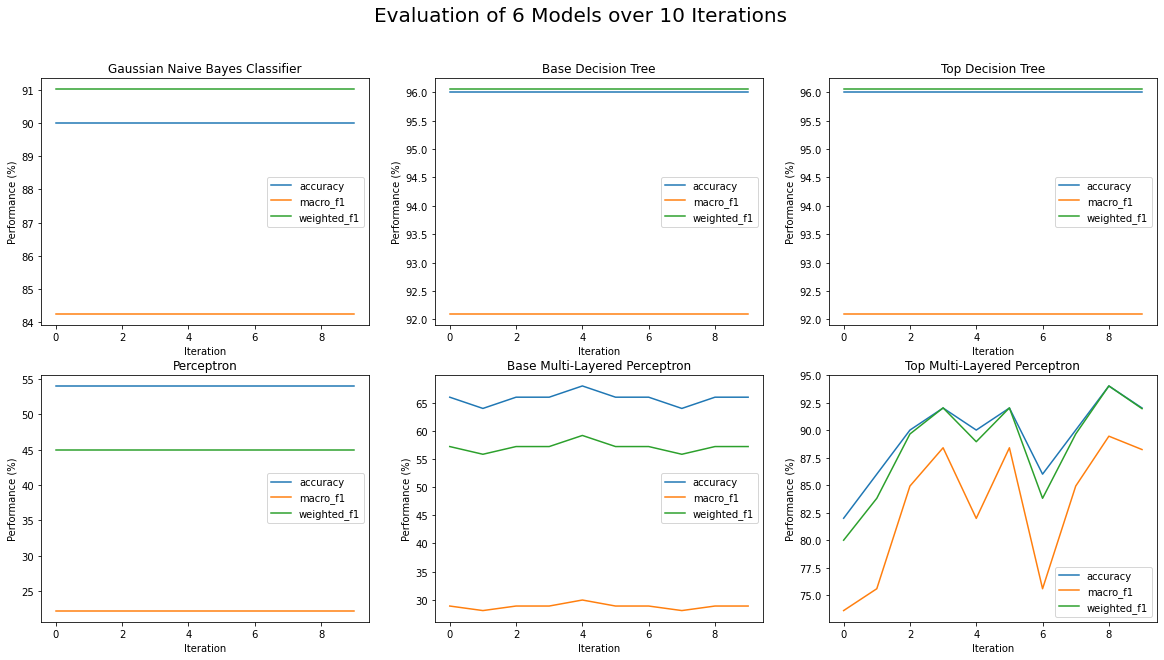

In [49]:
fig, ax = plt.subplots(2 ,3, figsize=(20,10))
plt.suptitle("Evaluation of 6 Models over 10 Iterations", fontsize=20)

avg_accuracy, avg_macro_f1, avg_weighted_f1, accuracy_sd, macro_f1_sd, weighted_f1_sd   = np.zeros(6), np.zeros(6), np.zeros(6), np.zeros(6), np.zeros(6), np.zeros(6)
nb_accuracies, nb_macro_f1s, nb_weighted_f1s, nb_precisions, nb_recalls = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)
base_dt_accuracies, base_dt_macro_f1s, base_dt_weighted_f1s, base_dt_precisions, base_dt_recalls = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)
top_dt_accuracies, top_dt_macro_f1s, top_dt_weighted_f1s, top_dt_precisions, top_dt_recalls = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)
perceptron_accuracies, perceptron_macro_f1s, perceptron_weighted_f1s, perceptron_precisions, perceptron_recalls = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)
base_mlp_accuracies, base_mlp_macro_f1s, base_mlp_weighted_f1s, base_mlp_precisions, base_mlp_recalls = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)
top_mlp_accuracies, top_mlp_macro_f1s, top_mlp_weighted_f1s, top_mlp_precisions, top_mlp_recalls = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)
for i in range(10):
    # (a) NB: a Gaussian Naive Bayes Classifier with the default parameters
    nb = GaussianNB().fit(X_train, y_train) # Create a model using training data
    nb_y_test_pred = nb.predict(X_test) # Use the model created to make predictions on the test data

    accuracy = accuracy_score(y_test, nb_y_test_pred)
    precision = precision_score(y_test, nb_y_test_pred, average='micro')
    recall = recall_score(y_test, nb_y_test_pred, average='micro')
    f1_macro = f1_score(y_test, nb_y_test_pred, average='macro')
    f1_weighted = f1_score(y_test, nb_y_test_pred, average='weighted')

    nb_accuracies[i] = accuracy
    nb_precisions[i] = precision
    nb_recalls[i] = recall
    nb_macro_f1s[i] = f1_macro
    nb_weighted_f1s[i] = f1_weighted
    
    # (b) Base-DT: a Decision Tree with the default parameters
    base_dt = DecisionTreeClassifier().fit(X_train, y_train)
    base_dt_y_test_pred = base_dt.predict(X_test) # Use the model created to make predictions on the test data
    
    accuracy = accuracy_score(y_test, base_dt_y_test_pred)
    precision = precision_score(y_test, base_dt_y_test_pred, average='micro')
    recall = recall_score(y_test, base_dt_y_test_pred, average='micro')
    f1_macro = f1_score(y_test, base_dt_y_test_pred, average='macro')
    f1_weighted = f1_score(y_test, base_dt_y_test_pred, average='weighted')

    base_dt_accuracies[i] = accuracy
    base_dt_precisions[i] = precision
    base_dt_recalls[i] = recall
    base_dt_macro_f1s[i] = f1_macro
    base_dt_weighted_f1s[i] = f1_weighted
    
    # (c) Top-DT: a better performing Decision Tree
    parameters = {'criterion':('gini', 'entropy'), 'max_depth':[3, 10], 'min_samples_split':[3, 5, 6]}
    top_dt = GridSearchCV(base_dt, parameters).fit(X_train, y_train)
    top_dt_y_test_pred = top_dt.predict(X_test) # Use the model created to make predictions on the test data
    
    accuracy = accuracy_score(y_test, top_dt_y_test_pred)
    precision = precision_score(y_test, top_dt_y_test_pred, average='micro')
    recall = recall_score(y_test, top_dt_y_test_pred, average='micro')
    f1_macro = f1_score(y_test, top_dt_y_test_pred, average='macro')
    f1_weighted = f1_score(y_test, top_dt_y_test_pred, average='weighted')

    top_dt_accuracies[i] = accuracy
    top_dt_precisions[i] = precision
    top_dt_recalls[i] = recall
    top_dt_macro_f1s[i] = f1_macro
    top_dt_weighted_f1s[i] = f1_weighted
    
    # (d) PER: a Perceptron, with default parameter values
    perceptron = Perceptron().fit(X_train, y_train)
    perceptron_y_test_pred = perceptron.predict(X_test) # Use the model created to make predictions on the test data
    
    accuracy = accuracy_score(y_test, perceptron_y_test_pred)
    precision = precision_score(y_test, perceptron_y_test_pred, average='micro')
    recall = recall_score(y_test, perceptron_y_test_pred, average='micro')
    f1_macro = f1_score(y_test, perceptron_y_test_pred, average='macro')
    f1_weighted = f1_score(y_test, perceptron_y_test_pred, average='weighted')

    perceptron_accuracies[i] = accuracy
    perceptron_precisions[i] = precision
    perceptron_recalls[i] = recall
    perceptron_macro_f1s[i] = f1_macro
    perceptron_weighted_f1s[i] = f1_weighted
    
    # (e) Base-MLP: a Multi-Layered Perceptron with 1 hidden layer of 100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters.
    base_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd', max_iter=5000).fit(X_train, y_train)
    base_mlp_y_test_pred = base_mlp.predict(X_test) # Use the model created to make predictions on the test data
    
    accuracy = accuracy_score(y_test, base_mlp_y_test_pred)
    precision = precision_score(y_test, base_mlp_y_test_pred, average='micro')
    recall = recall_score(y_test, base_mlp_y_test_pred, average='micro')
    f1_macro = f1_score(y_test, base_mlp_y_test_pred, average='macro')
    f1_weighted = f1_score(y_test, base_mlp_y_test_pred, average='weighted')

    base_mlp_accuracies[i] = accuracy
    base_mlp_precisions[i] = precision
    base_mlp_recalls[i] = recall
    base_mlp_macro_f1s[i] = f1_macro
    base_mlp_weighted_f1s[i] = f1_weighted
    
    # (f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search
    parameters = {'activation':('logistic', 'tanh', 'relu', 'identity'), 'hidden_layer_sizes':[(30, 50), (10, 10, 10)], 'solver':('adam', 'sgd')}
    top_mlp = GridSearchCV(base_mlp, parameters).fit(X_train, y_train)
    top_mlp_y_test_pred = top_mlp.predict(X_test) # Use the model created to make predictions on the test data
    
    accuracy = accuracy_score(y_test, top_mlp_y_test_pred)
    precision = precision_score(y_test, top_mlp_y_test_pred, average='micro')
    recall = recall_score(y_test, top_mlp_y_test_pred, average='micro')
    f1_macro = f1_score(y_test, top_mlp_y_test_pred, average='macro')
    f1_weighted = f1_score(y_test, top_mlp_y_test_pred, average='weighted')

    top_mlp_accuracies[i] = accuracy
    top_mlp_precisions[i] = precision
    top_mlp_recalls[i] = recall
    top_mlp_macro_f1s[i] = f1_macro
    top_mlp_weighted_f1s[i] = f1_weighted
    
ax[0, 0].plot(np.arange(10), nb_accuracies*100, label='accuracy')
# ax[0, 0].plot(np.arange(10), nb_precisions*100, label='precision')
# ax[0, 0].plot(np.arange(10), nb_recalls*100, label='recall')
ax[0, 0].plot(np.arange(10), nb_macro_f1s*100, label='macro_f1')
ax[0, 0].plot(np.arange(10), nb_weighted_f1s*100, label='weighted_f1')
ax[0, 0].legend()
ax[0, 0].set_xlabel('Iteration')
ax[0, 0].set_ylabel('Performance (%)')
ax[0, 0].set_title('Gaussian Naive Bayes Classifier')

ax[0, 1].plot(np.arange(10), base_dt_accuracies*100,label='accuracy')
# ax[0, 1].plot(np.arange(10), base_dt_precisions*100,label='precision')
# ax[0, 1].plot(np.arange(10), base_dt_recalls*100,label='recall')
ax[0, 1].plot(np.arange(10), base_dt_macro_f1s*100, label='macro_f1')
ax[0, 1].plot(np.arange(10), base_dt_weighted_f1s*100, label='weighted_f1')
ax[0, 1].legend()
ax[0, 1].set_xlabel('Iteration')
ax[0, 1].set_ylabel('Performance (%)')
ax[0, 1].set_title('Base Decision Tree')

ax[0, 2].plot(np.arange(10), top_dt_accuracies*100,label='accuracy')
# ax[0, 2].plot(np.arange(10), top_dt_precisions*100,label='precision')
# ax[0, 2].plot(np.arange(10), top_dt_recalls*100,label='recall')
ax[0, 2].plot(np.arange(10), top_dt_macro_f1s*100, label='macro_f1')
ax[0, 2].plot(np.arange(10), top_dt_weighted_f1s*100, label='weighted_f1')
ax[0, 2].legend()
ax[0, 2].set_xlabel('Iteration')
ax[0, 2].set_ylabel('Performance (%)')
ax[0, 2].set_title('Top Decision Tree')

ax[1, 0].plot(np.arange(10), perceptron_accuracies*100,label='accuracy')
# ax[1, 0].plot(np.arange(10), perceptron_precisions*100,label='precision')
# ax[1, 0].plot(np.arange(10), perceptron_recalls*100,label='recall')
ax[1, 0].plot(np.arange(10), perceptron_macro_f1s*100, label='macro_f1')
ax[1, 0].plot(np.arange(10), perceptron_weighted_f1s*100, label='weighted_f1')
ax[1, 0].legend()
ax[1, 0].set_xlabel('Iteration')
ax[1, 0].set_ylabel('Performance (%)')
ax[1, 0].set_title('Perceptron')

ax[1, 1].plot(np.arange(10), base_mlp_accuracies*100,label='accuracy')
# ax[1, 1].plot(np.arange(10), base_mlp_precisions*100,label='precision')
# ax[1, 1].plot(np.arange(10), base_mlp_recalls*100,label='recall')
ax[1, 1].plot(np.arange(10), base_mlp_macro_f1s*100, label='macro_f1')
ax[1, 1].plot(np.arange(10), base_mlp_weighted_f1s*100, label='weighted_f1')
ax[1, 1].legend()
ax[1, 1].set_xlabel('Iteration')
ax[1, 1].set_ylabel('Performance (%)')
ax[1, 1].set_title('Base Multi-Layered Perceptron')

ax[1, 2].plot(np.arange(10), top_mlp_accuracies*100,label='accuracy')
# ax[1, 2].plot(np.arange(10), top_mlp_precisions*100,label='precision')
# ax[1, 2].plot(np.arange(10), top_mlp_recalls*100,label='recall')
ax[1, 2].plot(np.arange(10), top_mlp_macro_f1s*100, label='macro_f1')
ax[1, 2].plot(np.arange(10), top_mlp_weighted_f1s*100, label='weighted_f1')
ax[1, 2].legend()
ax[1, 2].set_xlabel('Iteration')
ax[1, 2].set_ylabel('Performance (%)')
ax[1, 2].set_title('Top Multi-Layered Perceptron')

Analyzing the plots above, we see that the <b>NB, Base DT, Top DT</b>, and <b>Perceptron</b> have <b>constant performance</b> over all iterations.<br><br>
This is because <b>no element of randomness</b> goes into the creation of these models.<br>
If the <b>same training and testing data</b> is used every time, the same priors and conditionals will be generated/calculated during the model creation, and in turn used to calculate the score of classes or the entropy in DTs.<br><br>
As for the Perceptron, the initial weights are always set to 1 according to the documentation, so the final weights will be also the same.<br> This is the reason why we do not see any changes in perfromance.<br>

For the <b>Base MLP</b> and <b>Top MLP</b>, we see <b>changes in performance</b> over the iterations.<br>
This is happening since these models use <b>random weights</b> and <b>bias initialization</b>. So, each iteration will have different final weights.<br>
The change in performance is less drastic in the Base MLP because we are not changing the hyper-parameters. While in Top MLP, we are not only using random parameters initialization, we are also experimenting with hyper-parameters.